In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
w = 0.05695
nc = 8.
tc = 0.
duration =  2. * np.pi * nc / w
# duration length 512
t0 = tc - duration * 0.5
t1 = tc + duration * 0.5
nt = 512 

In [3]:
data = zeros((45, 4))

for i in range (45):
    with open ('./interp%d.dat' % i) as f:
        accel = loadtxt(f)
    data[i, 0] = 1.35 / 40. * i
    spectra = fft.fft(accel[:, 2])
    
    if real(spectra[0]) >= 0:
        data[i, 1] = abs(spectra[0])
    else:
        data[i, 1] = -abs(spectra[0])
    
    data[i, 2] = abs(spectra[8])
    data[i, 3] = abs(spectra[24])

In [4]:
# load SPC data
SPC = zeros((31, 3))
with open ('./SPC_THz_PP_0.txt') as f:
    SPC_THz = loadtxt(f)
with open ('./SPC_THG_S_0.txt') as f:
    SPC_THG = loadtxt(f)

for i in range (31):
    SPC[i, 0] = 1.333/31.* i
    SPC[i, 1] = SPC_THz[i]
    SPC[i, 2] = SPC_THG[i]

In [5]:
# load experimental data
Exp = zeros((12, 3))
with open ('./Exp_THz_PP_0.txt') as f:
    Exp_THz = loadtxt(f)
with open ('./THG-S.txt') as f:
    Exp_THG = loadtxt(f)
with open ('./tau.txt') as f:
    tau = loadtxt(f)
Exp[:, 0] = tau[:]
Exp[:, 1] = Exp_THz[:]
Exp[:, 2] = Exp_THG[:]

In [6]:
# load spec data
with open('spec_Pi_0.dat', 'r') as f:
    extent = array(f.readline().split(' '), float)
    spec_0 = loadtxt(f);
    spec_0 = transpose(spec_0, (1,0))
    spec_0 = flipud(spec_0)
    #imshow(log10(spec_0))
    #colorbar()
with open('spec_Pi_half.dat', 'r') as f:
    extent = array(f.readline().split(' '), float)
    spec_1 = loadtxt(f);
    spec_1 = transpose(spec_1, (1,0))
    spec_1 =  flipud(spec_1)

Text(0.5, 1.0, 'Momentum Distribution ($ \\tau =$0.34 fs)')

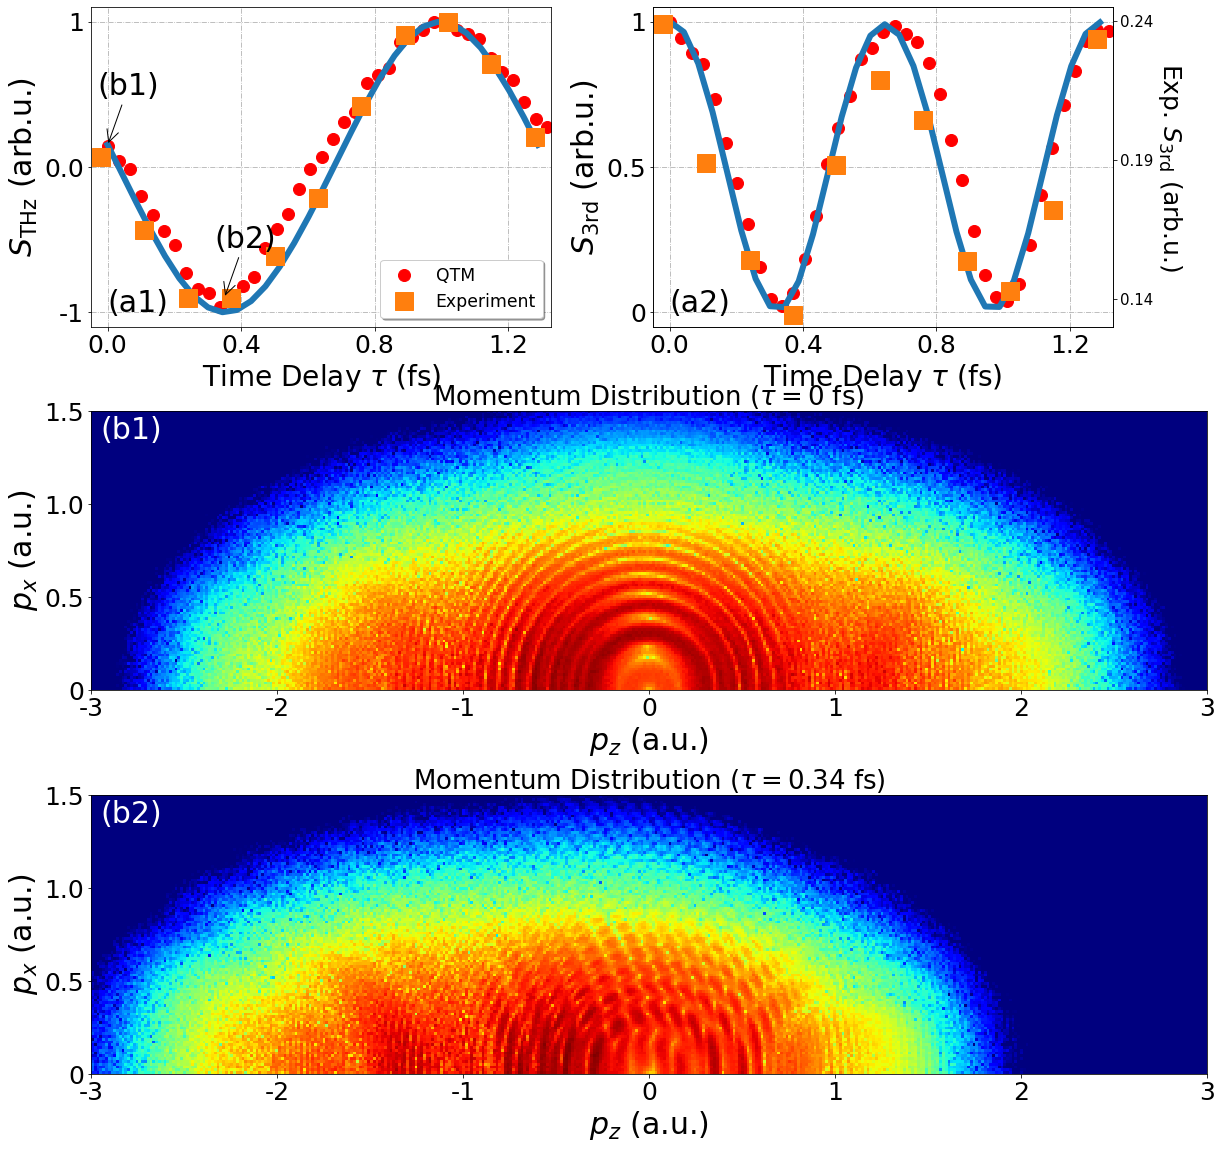

In [7]:
# data normalize
THzAmp = data[:, 1]/data[:, 2]
THzAmp = THzAmp/amax(abs(THzAmp))
Third = data[:, 3]/data[:, 2]
Third = (Third/amax(abs(Third)))*(Third/amax(abs(Third)))
# plot figure
figsize(20, 20)
fig = figure()
ax1 = subplot2grid((3, 24), (0, 0),colspan = 10)
ax1.plot(data[:, 0], THzAmp, marker='o', markersize = 12, linestyle='none', color='red', label='QTM')
ax1.plot(SPC[:, 0], -SPC[:, 1], linewidth = 6)
ax1.plot(Exp[:, 0], -Exp[:, 1], marker='s', markersize = 18, linestyle='none', label='Experiment')
ax1.grid(True, linestyle = '-.')
#ax1.tick_params(axis='y', labelsize=15)
#Yscale=linspace(-1, 1, 5)
#ax1.set_yticks(Yscale)
#ax1.set_yticklabels(('-1','-0.5','0.0','0.5','1'), size = 20)
Yscale=linspace(-1, 1, 3)
ax1.set_yticks(Yscale)
ax1.set_yticklabels(('-1','0.0','1'), size = 25)
#Xscale=linspace(0., 1.4, 8)
#ax1.set_xticks(Xscale)
#ax1.set_xticklabels(('0.0','0.2','0.4','0.6','0.8','1.0','1.2','1.4'), size = 25)
Xscale=linspace(0., 1.2, 4)
ax1.set_xticks(Xscale)
ax1.set_xticklabels(('0.0','0.4','0.8','1.2'), size = 25)
ax1.set_xlim(-0.05, 1.33)
ax1.set_xlabel(r'Time Delay $\tau$ (fs)', size = 28)
ax1.set_ylabel(r'$S_{\mathrm{THz}}$ (arb.u.)', size = 30)
ax1.text(-0.0, -1.0, '(a1)', fontsize = 30)
legend = ax1.legend(loc='lower right', shadow=True, fontsize='xx-large')
ax1.annotate(r'(b1)',
            xy=(0,0.15), xycoords='data',
            xytext=(-10, 50), textcoords='offset points',
            fontsize = 30,
            arrowprops=dict(arrowstyle="->"))
ax1.annotate(r'(b2)',
            xy=(0.35,-0.9), xycoords='data',
            xytext=(-10, 50), textcoords='offset points',
            fontsize = 30,
            arrowprops=dict(arrowstyle="->"))

ax2 = subplot2grid((3, 24), (0, 12),colspan = 10)
ax2.plot(data[:, 0], Third, marker='o', markersize = 12, linestyle='none', color='red')
ax2.plot(SPC[:, 0], SPC[:, 2], linewidth = 6)
#ax2.plot(Exp[:, 0], Exp[:, 2], marker='o', markersize=12)
ax2.grid(True, linestyle = '-.')

Yscale=linspace(0, 1, 3)
ax2.set_yticks(Yscale)
ax2.set_yticklabels(('0','0.5','1'), size = 25)
"""
#Yscale=linspace(-1, 1, 3)
#ax2.set_yticks(Yscale)
#ax2.set_yticklabels(('-1','0.0','1'), size = 25)
"""
"""
Xscale=linspace(0., 1.4, 8)
ax2.set_xticks(Xscale)
ax2.set_xticklabels(('0.0','0.2','0.4','0.6','0.8','1.0','1.2','1.4'), size = 20)
"""
Xscale=linspace(0., 1.2, 4)
ax2.set_xticks(Xscale)
ax2.set_xticklabels(('0.0','0.4','0.8','1.2'), size = 25)
ax2.set_xlim(-0.05, 1.33)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xlabel(r'Time Delay $\tau$ (fs)', size = 28)
ax2.set_ylabel(r'$S_{\mathrm{3rd}}$ (arb.u.)', size = 30)
ax3 = ax2.twinx()
ax3.plot(Exp[:, 0], Exp[:, 2], marker='s', color = '#ff7f0e', markersize=18, linestyle='none')
ax3.set_xlim(-0.05, 1.33)
Yscale=linspace(0.14, 0.24, 3)
ax3.set_yticks(Yscale)
ax3.set_yticklabels(('0.14','0.19','0.24'), size = 30)
ax3.tick_params(axis='y', labelsize=15)
ax3.set_ylim(0.13, 0.245)
ax3.set_ylabel(r'Exp. $S_{\mathrm{3rd}}$ (arb.u.)', labelpad =30, size = 25, rotation = -90)
ax2.text(-0.0, -0.0, '(a2)', fontsize = 30)

ax4 = subplot2grid((3, 24), (1, 0), colspan=24)
ax4.imshow(log10(spec_0), extent=[-3,3,0,1.5], cmap=cm.jet, vmin=-10, vmax=2)
ax4.set_xlabel('$p_z$ (a.u.)', size = 30)
ax4.set_ylabel('$p_x$ (a.u.)', size = 30)
Xscale=linspace(-3, 3, 7)
ax4.set_xticks(Xscale)
ax4.set_xticklabels(('-3','-2','-1','0','1','2','3'), size = 25)
Yscale=linspace(0, 1.5, 4)
ax4.set_yticks(Yscale)
ax4.set_yticklabels(('0','0.5','1.0','1.5'), size = 25)
ax4.text(-2.95, 1.35, '(b1)', fontsize = 30, color='w')
ax4.set_title(r'Momentum Distribution ($ \tau =$0 fs)', size = 26)

ax5 = subplot2grid((3, 24), (2, 0), colspan=24)
ax5.imshow(log10(spec_1), extent=[-3,3,0,1.5], cmap=cm.jet, vmin=-10, vmax=2) 
ax5.set_xlabel('$p_z$ (a.u.)', size = 30)
ax5.set_ylabel('$p_x$ (a.u.)', size = 30)
Xscale=linspace(-3, 3, 7)
ax5.set_xticks(Xscale)
ax5.set_xticklabels(('-3','-2','-1','0','1','2','3'), size = 25)
Yscale=linspace(0, 1.5, 4)
ax5.set_yticks(Yscale)
ax5.set_yticklabels(('0','0.5','1.0','1.5'), size = 25)
ax5.text(-2.95, 1.35, '(b2)', fontsize = 30, color='w')
ax5.set_title(r'Momentum Distribution ($ \tau =$0.34 fs)', size = 26)

#savefig('Fig_1',dpi=512, bbox_inches='tight')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
nofont = {'fontname':'Times New Roman'}
Size = 20

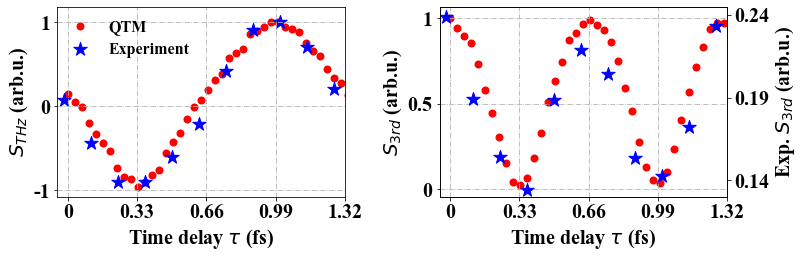

In [9]:
plt.figure(figsize=(12, 3.5))
plt.subplot(121)
#plt.plot(data[:, 0], THzAmp, markersize = 6, color='red', label='QTM',lw=3)
plt.scatter(data[:, 0], THzAmp, color='red', label='QTM',lw=2)
#plt.plot(SPC[:, 0], -SPC[:, 1], linewidth = 3)
plt.scatter(Exp[:, 0], -Exp[:, 1], label='Experiment',marker='*',color='b',s=200)
plt.grid(True, linestyle = '-.')

ax = plt.gca()
ax.set_yticks(np.linspace(-1,1, 3))
ax.set_yticklabels(('-1','0','1'),**nofont)
plt.legend(prop={'size':16, 'family':'Times New Roman'}, loc=(0,0.7), frameon=0)

plt.tick_params(axis='both', which='major', labelsize=20)
for label in (ax.get_xticklabels()):
    label.set_fontname('Times New Roman')
    
plt.xlim(-0.05, 1.33)
ax.set_xticks(np.linspace(0,1.333,5))
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont)
plt.ylabel(r'$S_{THz}$ (arb.u.)', size=Size,**nofont)
plt.xlabel(r'Time delay $\tau$ (fs)', size=Size,**nofont)

plt.subplot(122)
ax1 = plt.gca()
#ax1.plot(data[:, 0], Third, marker='o', markersize = 6, linestyle='none', color='red')
ax1.scatter(data[:, 0], Third, marker='o', color='red', lw=2)
#ax1.plot(SPC[:, 0], SPC[:, 2], linewidth = 3)
plt.grid(True, linestyle = '-.')
plt.tick_params(axis='both', which='major', labelsize=20)
for label in (ax1.get_xticklabels()):
    label.set_fontname('Times New Roman')
ax1.set_yticks(np.linspace(0,1, 3))
ax1.set_yticklabels(('0','0.5','1'),**nofont)
plt.xlim(-0.05, 1.33)
ax1.set_xticks(np.linspace(0,1.333,5))
ax1.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont)
plt.ylabel(r'$S_{3rd}$ (arb.u.)', size=Size,**nofont)
plt.xlabel(r'Time delay $\tau$ (fs)', size=Size,**nofont)
    
ax2 = ax1.twinx()
#ax2.plot(Exp[:, 0], Exp[:, 2], marker='s', color = '#ff7f0e', markersize=9, linestyle='none')
ax2.scatter(Exp[:, 0], Exp[:, 2], marker='*', color = 'b', s=200)
ax2.tick_params(axis='both', labelsize=Size)
ax2.set_ylim(0.13, 0.245)
ax2.set_yticks(np.linspace(0.14, 0.24, 3))
ax2.set_yticklabels(('0.14','0.19','0.24'),**nofont)
for l in ax2.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
ax2.set_ylabel(r'Exp. $S_{3rd}$ (arb.u.)', size=Size, **nofont)

plt.subplots_adjust(wspace=0.33)
#plt.savefig('fig/fig1_1.pdf',dpi=200, bbox_inches='tight')

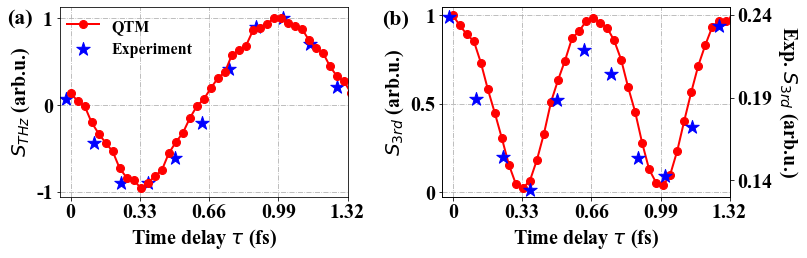

In [39]:
plt.figure(figsize=(12, 3.5))
fig1c = 'b'
plt.subplot(121)
ax = plt.gca()
ax.scatter(Exp[:, 0], -Exp[:, 1], label='Experiment',marker='*',color=fig1c,s=200)
plt.plot(data[:, 0], THzAmp, marker='o',markersize = 8, color='red', label='QTM',lw=2)
plt.grid(True, linestyle = '-.')

ax = plt.gca()
ax.set_yticks(np.linspace(-1,1, 3))
ax.set_yticklabels(('-1','0','1'),**nofont)
plt.legend(prop={'size':16, 'family':'Times New Roman'}, loc=(0,0.7), frameon=0)

plt.tick_params(axis='both', which='major', labelsize=20)
for label in (ax.get_xticklabels()):
    label.set_fontname('Times New Roman')
    
plt.xlim(-0.05, 1.33)
ax.set_xticks(np.linspace(0,1.333,5))
ax.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont)
plt.ylabel(r'$S_{THz}$ (arb.u.)', size=Size,**nofont)
plt.xlabel(r'Time delay $\tau$ (fs)', size=Size,**nofont)
ax.text(-0.305, 0.95, '(a)', fontsize = 1.1*Size, **nofont)

plt.subplot(122)
ax1 = plt.gca()
ax1.plot(data[:, 0], Third, marker='o', markersize = 8, color='red',lw=2)
plt.grid(True, linestyle = '-.')
plt.tick_params(axis='both', which='major', labelsize=20)
for label in (ax1.get_xticklabels()):
    label.set_fontname('Times New Roman')
ax1.set_yticks(np.linspace(0,1, 3))
ax1.set_yticklabels(('0','0.5','1'),**nofont)
plt.xlim(-0.05, 1.33)
ax1.set_xticks(np.linspace(0,1.333,5))
ax1.set_xticklabels(('0','0.33','0.66','0.99','1.32'),**nofont)
plt.ylabel(r'$S_{3rd}$ (arb.u.)', size=Size,**nofont)
plt.xlabel(r'Time delay $\tau$ (fs)', size=Size,**nofont)
ax1.text(-0.34, 0.95, '(b)', fontsize = 1.1*Size, **nofont)
    
ax2 = ax1.twinx()
ax2.scatter(Exp[:, 0], Exp[:, 2], marker='*', color =fig1c, s=200)
ax2.tick_params(axis='both', labelsize=Size)
ax2.set_ylim(0.13, 0.245)
ax2.set_yticks(np.linspace(0.14, 0.24, 3))
ax2.set_yticklabels(('0.14','0.19','0.24'),**nofont)
for l in ax2.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
ax2.set_ylabel(r'Exp. $S_{3rd}$ (arb.u.)', size=Size, **nofont, rotation = -90, labelpad = 28)
plt.subplots_adjust(wspace=0.33)
plt.savefig('fig/fig1_1.pdf',dpi=200, bbox_inches='tight')

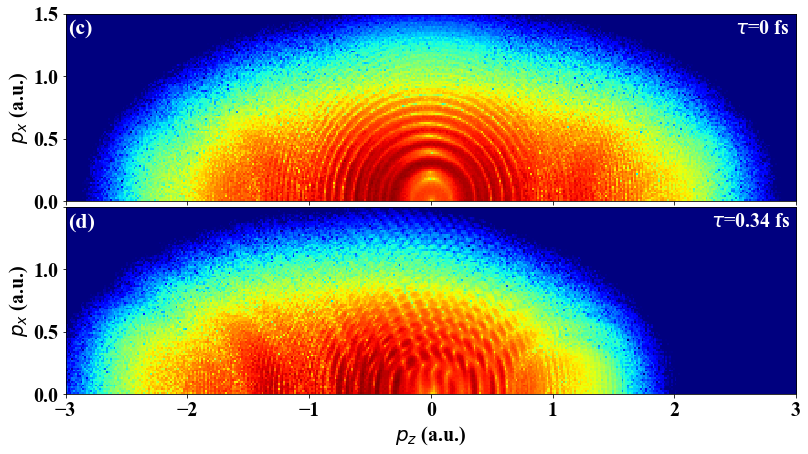

In [26]:
plt.figure(figsize=(13.09, 7))
extent = [-3,3,0,1.5]
plt.subplot(211)
plt.imshow(np.log10(spec_0), cmap='jet', extent=extent,aspect='auto',vmin=-10, vmax=2)
plt.ylabel('$p_x$ (a.u.)', size=Size,**nofont)
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_fontname('Times New Roman')
for label in ax.get_xticklabels():
    label.set_fontname('Times New Roman')
plt.tick_params(axis='both', labelsize=20,bottom=True, top=False, labelbottom=0, left=True, labelleft=True)
ax.text(2.5, 1.34, r'$\tau$=0 fs', fontsize = Size, **nofont, color='white')
ax.text(-2.98, 1.34, '(c)', fontsize = 1.1*Size, **nofont, color='white')

plt.subplot(212)
plt.imshow(log10(spec_1), extent=[-3,3,0,1.5], aspect='auto',cmap=cm.jet, vmin=-10, vmax=2) 
plt.xlabel('$p_z$ (a.u.)', size=Size,**nofont)
plt.ylabel('$p_x$ (a.u.)', size=Size,**nofont)
ax1 = plt.gca()
for label in ax1.get_xticklabels():
    label.set_fontname('Times New Roman')
ax1.set_yticks(np.linspace(0, 1.5, 4))
ax1.set_yticklabels(('0.0','0.5','1.0'),**nofont)
plt.tick_params(axis='both', which='major', labelsize=20)
ax1.text(2.3, 1.34, r'$\tau$=0.34 fs', fontsize = Size, **nofont, color='white')
ax1.text(-2.98, 1.34, '(d)', fontsize = 1.1*Size, **nofont, color='white')
plt.subplots_adjust(hspace=0.03)
plt.savefig('fig/fig1_2.pdf',dpi=200, bbox_inches='tight')

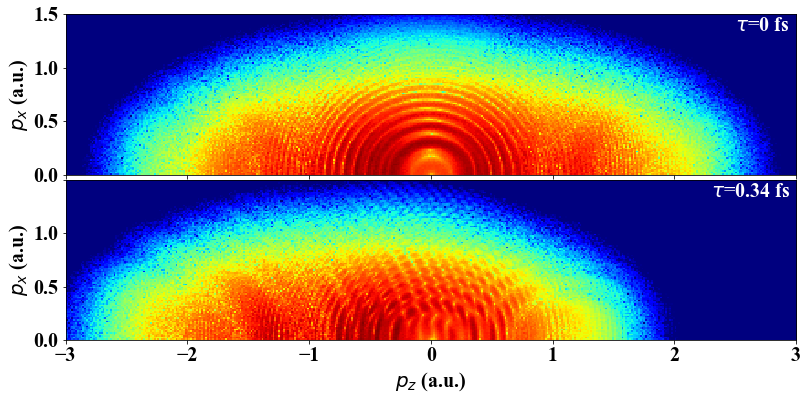

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (13.09, 6))
im1 = axes[0].imshow(np.log10(spec_0), cmap='jet', extent=extent,aspect='auto',vmin=-10, vmax=2)
axes[0].set_ylabel('$p_x$ (a.u.)', size=Size,**nofont)
for label in axes[0].get_yticklabels():
    label.set_fontname('Times New Roman')
for label in axes[0].get_xticklabels():
    label.set_fontname('Times New Roman')
axes[0].tick_params(axis='both', labelsize=20,bottom=True, top=False, labelbottom=0, left=True, labelleft=True)
axes[0].text(2.5, 1.34, r'$\tau$=0 fs', fontsize = Size, **nofont, color='white')

im2 = axes[1].imshow(log10(spec_1),aspect='auto', extent=[-3,3,0,1.5], cmap=cm.jet, vmin=-10, vmax=2) 
axes[1].set_xlabel('$p_z$ (a.u.)', size=Size,**nofont)
axes[1].set_ylabel('$p_x$ (a.u.)', size=Size,**nofont)
for label in (axes[1].get_xticklabels()):
    label.set_fontname('Times New Roman')
axes[1].set_yticks(np.linspace(0, 1.5, 4))
axes[1].set_yticklabels(('0.0','0.5','1.0'),**nofont)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].text(2.3, 1.34, r'$\tau$=0.34 fs', fontsize = Size, **nofont, color='white')
plt.subplots_adjust(hspace=0.03)
#plt.savefig('fig/fig1_2_1.pdf',dpi=200, bbox_inches='tight')
plt.show()